In [1]:
# ROCc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot
import numpy as np

In [2]:
# generate dataset
X, y = make_classification(n_samples=9000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.995], flip_y=0, random_state=5)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
model = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced')
model.fit(trainX, trainy)
model_p = model.predict_proba(testX)
model_p = model_p[:, 1]
fpr, tpr, thresholds = roc_curve(testy, model_p, pos_label=None, sample_weight=None, drop_intermediate=True)

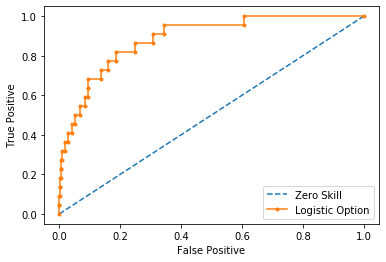

In [3]:
pyplot.plot([0,1], [0,1], linestyle='--', label='Zero Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic Option')
pyplot.xlabel('False Positive')
pyplot.ylabel('True Positive')
pyplot.legend()
pyplot.show()

Best Threshold=0.511615, G-Mean=0.815


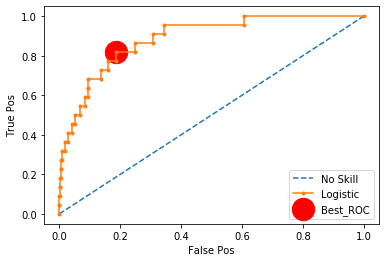

In [4]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# What is the max for g-mean?
ans = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ans], gmeans[ans]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ans], tpr[ans], marker='o', color='red', s=500, label='Best_ROC')
# axis labels
pyplot.xlabel('False Pos')
pyplot.ylabel('True Pos')
pyplot.legend()
pyplot.show()